# 8-2 합성곱 신경망을 만들어 패션 아이템을 분류합니다.

## 케라스 합성곱 층

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', 
                              input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5277 - accuracy: 0.8104 - val_loss: 0.3352 - val_accuracy: 0.8740
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3513 - accuracy: 0.8730 - val_loss: 0.2888 - val_accuracy: 0.8876
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3003 - accuracy: 0.8919 - val_loss: 0.2683 - val_accuracy: 0.9022
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2689 - accuracy: 0.9009 - val_loss: 0.2492 - val_accuracy: 0.9087
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2465 - accuracy: 0.9090 - val_loss: 0.2360 - val_accuracy: 0.9132
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2229 - accuracy: 0.9182 - val_loss: 0.2284 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2047 - accuracy: 0.9230 - val_loss: 0.2284 - val_accuracy:

In [9]:
import matplotlib.pyplot as plt

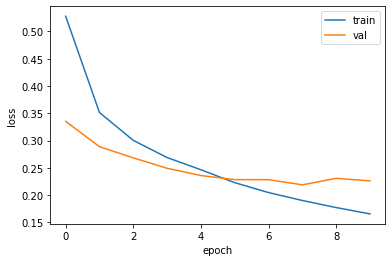

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.savefig('8_2-01', dpi=300)
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2189 - accuracy: 0.9203


[0.2189081460237503, 0.9203333258628845]